실습과제 16-1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
%cd /content/drive/MyDrive/Practice/Artificial_Intelligence

[Errno 2] No such file or directory: '/content/drive/MyDrive/Practice/Artificial_Intelligence'
/content


setup

In [ ]:
# Python 23.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn 20,20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
  %tensorflow_version 2.x
except Exception:
  pass

# TensorFlow 22,0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib. pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)

# %tensorflow_version only exists in Colab.
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
  print("Saving figure", fig_id)
  if tight_layout:
    plt.tight_layout ()
  plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
print("2019250059 한민욱")

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2019250059 한민욱


Vanishing/Exploding Gradients Problem

In [ ]:
def logit(z):
  return 1 / (1 * np.exp(-z))

Saving figure sigmoid_saturation_plot


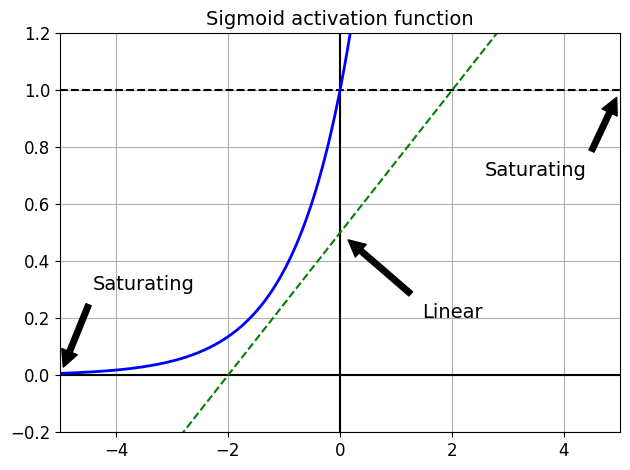

2019250059 한민욱


In [ ]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("sigmoid_saturation_plot")
plt.show()
print("2019250059 한민욱")

x축은 입력값을, y축은 시그모이드 함수의 출력값을 나타냅니다. 출력값은 0에서 1까지의 범위를 가지며, 확률을 나타냅니다.
시그모이드 함수는 S자 형태로 표현됩니다.
검은색 선은 x축, y축, 그리고 중간 라인을 나타냅니다.
초록색 점선은 시그모이드 함수가 포화되는 부분을 나타냅니다. 이 부분에서는 입력값의 변화에 따라 출력값이 거의 변하지 않습니다.
파란색 선은 시그모이드 함수의 곡선을 표현합니다. 이 부분에서는 입력값의 변화에 따라 출력값이 선형적으로 변화합니다.

Xavier and He Initailization

In [ ]:
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [ ]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

In [ ]:
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                          distribution='uniform')
keras.layers.Dense(10, activation="relu", kernel_initializer=init)


위 코드는 keras.initializers 모듈에 있는 모든 public 함수 및 속성의 이름을 가져와서 밑줄로 시작하지 않는 것들만 리스트로 반환합니다. 그 후에는 keras.layers.Dense를 사용하여 10개의 뉴런으로 이루어진 완전 연결 층을 만들고, 활성화 함수로는 ReLU를 사용하고, 가중치 행렬을 He 초기화 방법으로 초기화합니다.

이 코드는 초기화 방법을 설정하여 신경망의 가중치를 초기화할 때 사용되며, He 초기화 방법은 ReLU 활성화 함수와 함께 사용할 때 효과적입니다. He 초기화 방법은 Xavier 초기화 방법보다 ReLU 활성화 함수와 더 잘 맞아 더 좋은 성능을 보입니다.

Leaky ReLU


In [ ]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

Saving figure leaky_relu_plot


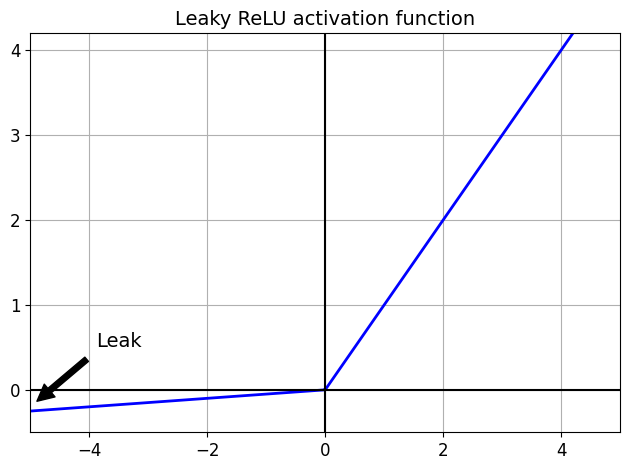

2019250059 한민욱


In [ ]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

save_fig("leaky_relu_plot")
plt.show()
print("2019250059 한민욱")


그래프의 형태:
x축은 입력값
𝑧
z를 나타냅니다. 이 값은 -5부터 5까지의 범위에서 변화합니다.
y축은 Leaky ReLU 함수의 출력값을 나타냅니다. 출력값은 0보다 크거나 같으며, 입력값이 음수일 때는 기울기가 0보다 작은 값으로 변화합니다.
그래프의 주요 부분:
파란색 선: Leaky ReLU 함수의 곡선을 나타냅니다. 입력값이 양수인 경우 ReLU와 같은 형태를 가지며, 입력값이 음수인 경우 음수에 비례하여 값이 줄어드는 것을 볼 수 있습니다.
검은색 선: x축과 y축을 나타냅니다.
주석:
'Leak': Leaky ReLU 함수의 입력값이 음수인 부분을 설명합니다. 이 부분에서는 기울기가 작은 값으로 설정되어 있습니다.
그래프의 제목과 축:
그래프의 제목은 "Leaky ReLU activation function"으로 설정되어 있습니다.
x축과 y축은 각각 입력값과 Leaky ReLU 함수의 출력값을 나타냅니다.
이 그래프를 통해 Leaky ReLU 함수의 특성을 시각적으로 확인할 수 있습니다.

In [ ]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'mish',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [ ]:
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 10s 5ms/step - loss: 1.2883 - accuracy: 0.5990 - val_loss: 0.8836 - val_accuracy: 0.7082
Epoch 2/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.7959 - accuracy: 0.7317 - val_loss: 0.7136 - val_accuracy: 0.7602
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6833 - accuracy: 0.7709 - val_loss: 0.6455 - val_accuracy: 0.7874
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6237 - accuracy: 0.7911 - val_loss: 0.5922 - val_accuracy: 0.8024
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5853 - accuracy: 0.8030 - val_loss: 0.5617 - val_accuracy: 0.8166
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5576 - accuracy: 0.8112 - val_loss: 0.5383 - val_accuracy: 0.8208
Epoch 7/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5365 - accuracy: 0.8186 - val_loss: 0.5191 - val_accurac

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 1.3641 - accuracy: 0.5979 - val_loss: 0.9027 - val_accuracy: 0.7258
Epoch 2/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.8091 - accuracy: 0.7465 - val_loss: 0.7171 - val_accuracy: 0.7674
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6883 - accuracy: 0.7775 - val_loss: 0.6439 - val_accuracy: 0.7906
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6253 - accuracy: 0.7957 - val_loss: 0.5895 - val_accuracy: 0.8082
Epoch 5/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5850 - accuracy: 0.8076 - val_loss: 0.5568 - val_accuracy: 0.8186
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5562 - accuracy: 0.8137 - val_loss: 0.5330 - val_accuracy: 0.8242
Epoch 7/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5344 - accuracy: 0.8208 - val_loss: 0.5138 - val_accuracy:

ELU

In [ ]:

def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

Saving figure elu_plot


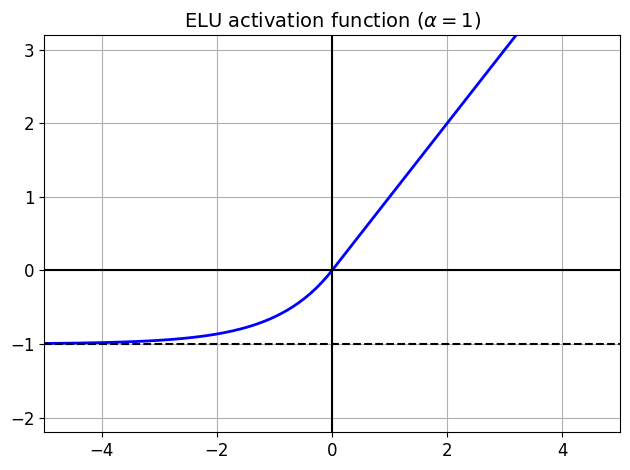

2019250059 한민욱


In [ ]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

save_fig("elu_plot")
plt.show()
print("2019250059 한민욱")

그래프의 형태:
x축은 입력값
𝑧
z를 나타냅니다. 이 값은 -5부터 5까지의 범위에서 변화합니다.
y축은 ELU 함수의 출력값을 나타냅니다. 출력값은 음수일 때 지수 함수의 특성에 따라 부드럽게 꺾이며, 양수일 때는 입력값과 동일한 값을 가집니다.
그래프의 주요 부분:
파란색 선: ELU 함수의 곡선을 나타냅니다. 입력값이 음수인 경우 부드럽게 꺾이는 것을 볼 수 있습니다.
검은색 선: x축과 y축을 나타냅니다.
검은색 점선: ELU 함수의 출력값이 -1로 수렴하는 부분을 나타냅니다.
그래프의 제목과 축:
그래프의 제목은 "ELU activation function ($\alpha=1$)"으로 설정되어 있습니다.
x축과 y축은 각각 입력값과 ELU 함수의 출력값을 나타냅니다.
이 그래프를 통해 ELU 함수의 특성을 시각적으로 확인할 수 있습니다.

In [ ]:
keras.layers.Dense(10, activation="elu")

SELU

In [ ]:
from scipy.special import erfc

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [ ]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

Saving figure selu_plot


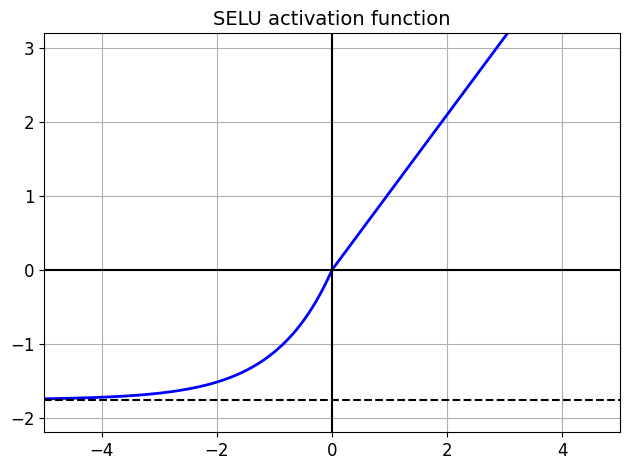

2019250059 한민욱


In [ ]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

save_fig("selu_plot")
plt.show()
print("2019250059 한민욱")

그래프의 형태:
x축은 입력값
𝑧
z를 나타냅니다. 이 값은 -5부터 5까지의 범위에서 변화합니다.
y축은 SELU 함수의 출력값을 나타냅니다. 출력값은 음수일 때 특정 값으로 수렴하며, 양수일 때는 입력값과 비슷한 값을 가집니다.
그래프의 주요 부분:
파란색 선: SELU 함수의 곡선을 나타냅니다. 입력값이 음수인 경우 특정 값으로 수렴하는 것을 볼 수 있습니다.
검은색 선: x축과 y축을 나타냅니다.
검은색 점선: SELU 함수의 출력값이 특정 값으로 수렴하는 부분을 나타냅니다.
그래프의 제목과 축:
그래프의 제목은 "SELU activation function"으로 설정되어 있습니다.
x축과 y축은 각각 입력값과 SELU 함수의 출력값을 나타냅니다.
이 그래프를 통해 SELU 함수의 특성을 시각적으로 확인할 수 있습니다.

In [ ]:
np.random.seed(42)
Z = np.random.normal(size=(500, 100)) # standardized inputs
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100)) # LeCun initialization
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.83
Layer 900: mean 0.02, std deviation 1.00


In [ ]:
keras.layers.Dense(10, activation="selu",
                   kernel_initializer="lecun_normal")

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [ ]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 11s 6ms/step - loss: 1.0701 - accuracy: 0.6671 - val_loss: 0.7026 - val_accuracy: 0.7794
Epoch 2/5
1719/1719 [==============================] - 11s 6ms/step - loss: 0.6945 - accuracy: 0.7758 - val_loss: 0.5830 - val_accuracy: 0.8086
Epoch 3/5
1719/1719 [==============================] - 11s 6ms/step - loss: 0.6087 - accuracy: 0.7988 - val_loss: 0.5565 - val_accuracy: 0.8284
Epoch 4/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5537 - accuracy: 0.8148 - val_loss: 0.5124 - val_accuracy: 0.8356
Epoch 5/5
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5198 - accuracy: 0.8235 - val_loss: 0.4648 - val_accuracy: 0.8434


In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 51s 24ms/step - loss: 1.9977 - accuracy: 0.2109 - val_loss: 1.7379 - val_accuracy: 0.2926
Epoch 2/5
1719/1719 [==============================] - 34s 20ms/step - loss: 1.5361 - accuracy: 0.3600 - val_loss: 1.3969 - val_accuracy: 0.4130
Epoch 3/5
1719/1719 [==============================] - 34s 20ms/step - loss: 1.1364 - accuracy: 0.5296 - val_loss: 1.0277 - val_accuracy: 0.5600
Epoch 4/5
1719/1719 [==============================] - 33s 19ms/step - loss: 0.9071 - accuracy: 0.6352 - val_loss: 0.8899 - val_accuracy: 0.6272
Epoch 5/5
1719/1719 [==============================] - 35s 21ms/step - loss: 0.7907 - accuracy: 0.6921 - val_loss: 0.7238 - val_accuracy: 0.7136


Batch Normalization

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 784)               0         
                                                                 
 batch_normalization_15 (Ba  (None, 784)               3136      
 tchNormalization)                                               
                                                                 
 dense_463 (Dense)           (None, 300)               235500    
                                                                 
 batch_normalization_16 (Ba  (None, 300)               1200      
 tchNormalization)                                               
                                                                 
 dense_464 (Dense)           (None, 100)               30100     
                                                                 
 batch_normalization_17 (Ba  (None, 100)             

In [ ]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization_15/gamma:0', True),
 ('batch_normalization_15/beta:0', True),
 ('batch_normalization_15/moving_mean:0', False),
 ('batch_normalization_15/moving_variance:0', False)]

In [ ]:
bn1.updates

<ipython-input-129-3f3161b80a85>:1: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  bn1.updates


[]

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3186 - accuracy: 0.8880 - val_loss: 0.3221 - val_accuracy: 0.8876
Epoch 2/10
1719/1719 [==============================] - 19s 11ms/step - loss: 0.3154 - accuracy: 0.8869 - val_loss: 0.3192 - val_accuracy: 0.8874
Epoch 3/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3136 - accuracy: 0.8894 - val_loss: 0.3192 - val_accuracy: 0.8884
Epoch 4/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3083 - accuracy: 0.8914 - val_loss: 0.3182 - val_accuracy: 0.8882
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3045 - accuracy: 0.8915 - val_loss: 0.3173 - val_accuracy: 0.8900
Epoch 6/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3020 - accuracy: 0.8921 - val_loss: 0.3155 - val_accuracy: 0.8884
Epoch 7/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3000 - accuracy: 0.8944 - val_loss: 0.3139 - val_ac

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 12s 6ms/step - loss: 1.0866 - accuracy: 0.6549 - val_loss: 0.6853 - val_accuracy: 0.7882
Epoch 2/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.6840 - accuracy: 0.7798 - val_loss: 0.5587 - val_accuracy: 0.8206
Epoch 3/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5980 - accuracy: 0.8020 - val_loss: 0.5021 - val_accuracy: 0.8350
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5459 - accuracy: 0.8173 - val_loss: 0.4665 - val_accuracy: 0.8454
Epoch 5/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.5111 - accuracy: 0.8266 - val_loss: 0.4436 - val_accuracy: 0.8536
Epoch 6/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4900 - accuracy: 0.8316 - val_loss: 0.4259 - val_accuracy: 0.8564
Epoch 7/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4713 - accuracy: 0.8387 - val_loss: 0.4118 - val_ac

keras.models.Sequential: Sequential 모델을 생성합니다. 이 모델은 각 층이 차례대로 연결된 신경망을 정의합니다.
keras.layers.Flatten(input_shape=[28, 28]): 입력 이미지를 28x28 크기의 2D 배열에서 1D 배열로 변환합니다.
keras.layers.BatchNormalization(): 배치 정규화 층을 추가합니다. 이 층은 각 배치의 평균과 표준 편차를 사용하여 입력을 정규화합니다.
keras.layers.Dense(300, use_bias=False): 300개의 뉴런을 가진 완전 연결 층을 추가합니다. use_bias=False로 설정하여 편향을 사용하지 않습니다.
keras.layers.Activation("relu"): ReLU 활성화 함수를 적용합니다.
keras.layers.Dense(100, use_bias=False): 100개의 뉴런을 가진 완전 연결 층을 추가합니다.
keras.layers.Activation("relu"): ReLU 활성화 함수를 적용합니다.
keras.layers.Dense(10, activation="softmax"): 10개의 뉴런을 가진 완전 연결 층을 추가하고, 출력을 다중 클래스 분류를 위한 확률로 변환하기 위해 소프트맥스 활성화 함수를 사용합니다.
model.compile: 모델을 컴파일합니다. 손실 함수로는 sparse_categorical_crossentropy를, 옵티마이저로는 SGD(확률적 경사 하강법)을 사용합니다. 정확도 지표를 사용하여 모델을 평가합니다.
model.fit: 훈련 데이터(X_train, y_train)를 사용하여 모델을 10번의 epoch 동안 훈련합니다. 검증 데이터(X_valid, y_valid)를 사용하여 검증합니다. 훈련 과정의 결과는 history 객체에 저장됩니다.
이렇게 구성된 모델은 배치 정규화를 사용하여 훈련 속도를 높이고, 그래디언트 소실과 폭주 문제를 줄여줍니다.

실습과제#16-2 Transfer Learning - Fashion MNIST dataset

Reusing a Keras model

In [ ]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [ ]:
X_train_A.shape

(43986, 28, 28)

In [ ]:
X_train_B.shape

(200, 28, 28)

In [ ]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [ ]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

split_dataset 함수:
함수는 입력으로 특성 행렬 X와 타겟 벡터 y를 받습니다.
y_5_or_6은 y가 5 또는 6인지를 나타내는 불리언 마스크입니다.
y_A는 클래스 5 또는 6을 제외한 클래스들을 포함합니다.
y_B는 클래스가 6인지를 이진 분류하기 위한 타겟 벡터입니다.
마지막으로 특성과 타겟을 각 서브셋에 할당하여 반환합니다.
데이터셋 분할:
split_dataset 함수를 사용하여 훈련, 검증, 테스트 데이터셋을 두 개의 서브셋으로 분할합니다.
split_dataset 함수를 호출한 결과를 각각의 데이터셋에 할당합니다.
데이터셋 크기 확인:
X_train_A의 모양은 (샘플 수, 특성 수)로 출력됩니다.
X_train_B의 모양은 (샘플 수, 특성 수)로 출력됩니다.
처음 30개의 요소만 출력하여 y_train_A와 y_train_B의 일부를 확인합니다.
이 코드를 통해 데이터셋이 두 개의 서브셋으로 나뉘고, 각 서브셋의 크기와 내용을 확인할 수 있습니다.

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [ ]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [ ]:
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 9s 6ms/step - loss: 0.5917 - accuracy: 0.8094 - val_loss: 0.3928 - val_accuracy: 0.8647
Epoch 2/20
1375/1375 [==============================] - 6s 5ms/step - loss: 0.3617 - accuracy: 0.8757 - val_loss: 0.3287 - val_accuracy: 0.8869
Epoch 3/20
1375/1375 [==============================] - 8s 6ms/step - loss: 0.3241 - accuracy: 0.8868 - val_loss: 0.3016 - val_accuracy: 0.8976
Epoch 4/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.3035 - accuracy: 0.8945 - val_loss: 0.2877 - val_accuracy: 0.9031
Epoch 5/20
1375/1375 [==============================] - 8s 6ms/step - loss: 0.2888 - accuracy: 0.8999 - val_loss: 0.2756 - val_accuracy: 0.9081
Epoch 6/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.2781 - accuracy: 0.9042 - val_loss: 0.2706 - val_accuracy: 0.9073
Epoch 7/20
1375/1375 [==============================] - 8s 6ms/step - loss: 0.2694 - accuracy: 0.9085 - val_loss: 0.2660 - val_accuracy:

In [ ]:
model_A.save("my_model_A.h5")

In [ ]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [ ]:
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 1s 52ms/step - loss: 1.1557 - accuracy: 0.3100 - val_loss: 0.8156 - val_accuracy: 0.3185
Epoch 2/20
7/7 [==============================] - 0s 32ms/step - loss: 0.7461 - accuracy: 0.4650 - val_loss: 0.6354 - val_accuracy: 0.6755
Epoch 3/20
7/7 [==============================] - 0s 20ms/step - loss: 0.5984 - accuracy: 0.7050 - val_loss: 0.5318 - val_accuracy: 0.7850
Epoch 4/20
7/7 [==============================] - 0s 19ms/step - loss: 0.5032 - accuracy: 0.8250 - val_loss: 0.4587 - val_accuracy: 0.8590
Epoch 5/20
7/7 [==============================] - 0s 31ms/step - loss: 0.4348 - accuracy: 0.8700 - val_loss: 0.4038 - val_accuracy: 0.9138
Epoch 6/20
7/7 [==============================] - 0s 31ms/step - loss: 0.3802 - accuracy: 0.9300 - val_loss: 0.3594 - val_accuracy: 0.9371
Epoch 7/20
7/7 [==============================] - 0s 32ms/step - loss: 0.3369 - accuracy: 0.9600 - val_loss: 0.3245 - val_accuracy: 0.9523
Epoch 8/20
7/7 [===========

In [ ]:
model_B.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_20 (Flatten)        (None, 784)               0         
                                                                 
 dense_475 (Dense)           (None, 300)               235500    
                                                                 
 dense_476 (Dense)           (None, 100)               30100     
                                                                 
 dense_477 (Dense)           (None, 50)                5050      
                                                                 
 dense_478 (Dense)           (None, 50)                2550      
                                                                 
 dense_479 (Dense)           (None, 50)                2550      
                                                                 
 dense_480 (Dense)           (None, 1)               

위 코드는 두 개의 서브넷을 이용하여 다중 출력 및 이진 분류 작업을 수행하는 모델을 구축하는 과정을 보여줍니다. 각 부분에 대해 살펴보겠습니다:

model_A:
다중 출력 작업을 위한 모델로, 8개의 클래스를 분류하는 softmax 출력층을 포함합니다.
5개의 은닉층이 있으며, 각각 300, 100, 50, 50, 50개의 뉴런과 SELU 활성화 함수를 사용합니다.
손실 함수로는 sparse categorical crossentropy를, 옵티마이저로는 SGD를 사용하여 컴파일합니다.
훈련 데이터셋 (X_train_A, y_train_A)을 사용하여 모델을 훈련합니다.
model_B:
이진 분류 작업을 위한 모델로, 1개의 뉴런과 시그모이드 활성화 함수를 사용하는 출력층을 포함합니다.
5개의 은닉층이 있으며, 각각 300, 100, 50, 50, 50개의 뉴런과 SELU 활성화 함수를 사용합니다.
손실 함수로는 binary crossentropy를, 옵티마이저로는 SGD를 사용하여 컴파일합니다.
훈련 데이터셋 (X_train_B, y_train_B)을 사용하여 모델을 훈련합니다.
model_B.summary():
모델 model_B의 구조와 파라미터 수를 요약하여 출력합니다.
이렇게 구성된 모델은 두 가지 서로 다른 작업을 수행하며, 각 서브넷은 공유되는 은닉층을 사용하여 특성을 학습합니다.

In [ ]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())
model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

In [ ]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 1s 59ms/step - loss: 0.3996 - accuracy: 0.8400 - val_loss: 0.4004 - val_accuracy: 0.8225
Epoch 2/4
7/7 [==============================] - 0s 16ms/step - loss: 0.3737 - accuracy: 0.8550 - val_loss: 0.3758 - val_accuracy: 0.8499
Epoch 3/4
7/7 [==============================] - 0s 18ms/step - loss: 0.3494 - accuracy: 0.8850 - val_loss: 0.3546 - val_accuracy: 0.8712
Epoch 4/4
7/7 [==============================] - 0s 17ms/step - loss: 0.3285 - accuracy: 0.8950 - val_loss: 0.3364 - val_accuracy: 0.8854
Epoch 1/16
7/7 [==============================] - 1s 46ms/step - loss: 0.2799 - accuracy: 0.9300 - val_loss: 0.2513 - val_accuracy: 0.9310
Epoch 2/16
7/7 [==============================] - 0s 33ms/step - loss: 0.2077 - accuracy: 0.9500 - val_loss: 0.2000 - val_accuracy: 0.9544
Epoch 3/16
7/7 [==============================] - 0s 17ms/step - loss: 0.1635 - accuracy: 0.9700 - val_loss: 0.1688 - val_accuracy: 0.9625
Epoch 4/16
7/7 [===============

In [ ]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 0.1420 - accuracy: 0.9895


[0.1419816017150879, 0.9894999861717224]

In [ ]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 0.0694 - accuracy: 0.9820


[0.06939390301704407, 0.9819999933242798]

In [ ]:

(100 - 97.05) / (100 - 99.25)

3.933333333333337

model_A 로드 및 재활용:
이전에 저장된 모델인 my_model_A.h5를 로드합니다.
model_A의 마지막 층을 제외한 모든 층을 가져와서 새로운 모델 model_B_on_A에 추가합니다.
model_B_on_A에 이진 분류를 위한 출력층을 추가합니다.
model_A 클론 및 파라미터 공유:
clone_model 함수를 사용하여 model_A의 정확한 복제본을 만듭니다.
복제본에 model_A의 가중치를 설정합니다.
model_B_on_A에 공유된 층을 추가합니다. 이 층들은 학습되지 않습니다.
미세 조정:
공유된 층을 제외한 모든 층을 학습 가능하게 설정합니다.
모델을 다시 컴파일하고 훈련 데이터로 훈련을 진행합니다.
이 과정을 통해 층의 학습이 진행되며, 전이 학습을 통해 초기에는 빠르게 수렴하고, 이후에는 세밀한 튜닝이 이루어집니다.
모델 평가:
model_B와 model_B_on_A의 성능을 테스트 데이터로 평가합니다.
두 모델의 성능을 비교하고 성능 향상 정도를 계산합니다.
이 과정을 통해 다중 출력 모델의 일부를 재활용하여 이진 분류 모델을 구축하고 향상시키는 방법을 보여줍니다.

Faster Optimizers

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4235 - accuracy: 0.8537 - val_loss: 0.3800 - val_accuracy: 0.8714
Epoch 2/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4130 - accuracy: 0.8566 - val_loss: 0.3734 - val_accuracy: 0.8716
Epoch 3/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.4085 - accuracy: 0.8585 - val_loss: 0.3702 - val_accuracy: 0.8740
Epoch 4/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3974 - accuracy: 0.8630 - val_loss: 0.3647 - val_accuracy: 0.8772
Epoch 5/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3895 - accuracy: 0.8642 - val_loss: 0.3614 - val_accuracy: 0.8766
Epoch 6/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3849 - accuracy: 0.8655 - val_loss: 0.3578 - val_accuracy: 0.8756
Epoch 7/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3790 - accuracy: 0.8686 - val_loss: 0.3533 - val_ac

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3601 - accuracy: 0.8743 - val_loss: 0.3456 - val_accuracy: 0.8812
Epoch 2/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3547 - accuracy: 0.8755 - val_loss: 0.3423 - val_accuracy: 0.8822
Epoch 3/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3534 - accuracy: 0.8771 - val_loss: 0.3421 - val_accuracy: 0.8822
Epoch 4/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3456 - accuracy: 0.8799 - val_loss: 0.3393 - val_accuracy: 0.8836
Epoch 5/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3410 - accuracy: 0.8809 - val_loss: 0.3385 - val_accuracy: 0.8840
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3381 - accuracy: 0.8810 - val_loss: 0.3359 - val_accuracy: 0.8846
Epoch 7/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3346 - accuracy: 0.8826 - val_loss: 0.3331 - val_ac

In [ ]:
optimizer = keras.optimizers.Adagrad(learning_rate=0.001)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3218 - accuracy: 0.8871 - val_loss: 0.3303 - val_accuracy: 0.8830
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3185 - accuracy: 0.8870 - val_loss: 0.3282 - val_accuracy: 0.8864
Epoch 3/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3175 - accuracy: 0.8902 - val_loss: 0.3290 - val_accuracy: 0.8850
Epoch 4/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3111 - accuracy: 0.8915 - val_loss: 0.3271 - val_accuracy: 0.8880
Epoch 5/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3078 - accuracy: 0.8922 - val_loss: 0.3268 - val_accuracy: 0.8862
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3054 - accuracy: 0.8917 - val_loss: 0.3247 - val_accuracy: 0.8854
Epoch 7/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3030 - accuracy: 0.8930 - val_loss: 0.3222 - val_ac

In [ ]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [ ]:
optimizer = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [ ]:
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

SGD (Stochastic Gradient Descent):
가장 기본적인 경사 하강법 알고리즘입니다.
momentum 매개변수를 사용하여 관성을 추가할 수 있습니다.
nesterov 매개변수를 사용하여 네스테로프 가속 경사(NAG)를 적용할 수 있습니다.
Adagrad:
학습률을 각각의 매개변수에 대해 조절하는 방식으로 학습률을 조절합니다.
이전 기울기 값들을 제곱하여 더해가면서 학습률을 갱신합니다.
자주 업데이트 되는 매개변수들은 점점 작아지는 학습률을 가지게 됩니다.
RMSprop (Root Mean Square Propagation):
Adagrad의 단점을 보완한 알고리즘으로, 지수 이동 평균을 사용하여 학습률을 조절합니다.
과거 기울기의 제곱에 대한 지수 가중 평균을 사용하여 학습률을 갱신합니다.
최신 기울기 정보를 더 많이 반영하기 때문에 Adagrad보다 더 좋은 성능을 보입니다.
Adam (Adaptive Moment Estimation):
모멘텀과 RMSprop을 결합한 방식으로, 지수 이동 평균을 사용하여 학습률과 모멘텀을 조절합니다.
모멘텀과 RMSprop의 장점을 모두 가지고 있어 다양한 문제에 적용하기 좋습니다.
Adamax:
Adam의 변형 알고리즘으로, 무한 노름(norm)에 대한 학습률을 사용하여 가중치를 갱신합니다.
Nadam (Nesterov-accelerated Adaptive Moment Estimation):
네스테로프 가속 경사(NAG)와 Adam을 결합한 방식으로, 모멘텀과 지수 이동 평균을 사용하여 학습률과 모멘텀을 조절합니다.
Adam의 장점을 가지면서도 네스테로프 가속 경사의 특징을 가지고 있습니다.

Learning Rate Scheduling

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.01)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4872 - accuracy: 0.8287 - val_loss: 0.4050 - val_accuracy: 0.8586
Epoch 2/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3783 - accuracy: 0.8659 - val_loss: 0.3690 - val_accuracy: 0.8698
Epoch 3/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3445 - accuracy: 0.8765 - val_loss: 0.3791 - val_accuracy: 0.8670
Epoch 4/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3223 - accuracy: 0.8841 - val_loss: 0.3484 - val_accuracy: 0.8784
Epoch 5/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3053 - accuracy: 0.8907 - val_loss: 0.3408 - val_accuracy: 0.8804
Epoch 6/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2884 - accuracy: 0.8961 - val_loss: 0.3437 - val_accuracy: 0.8808
Epoch 7/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2760 - accuracy: 0.9003 - val_loss: 0.3424 - val_accuracy:

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4742 - accuracy: 0.8345 - val_loss: 0.3573 - val_accuracy: 0.8712
Epoch 2/2
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3453 - accuracy: 0.8746 - val_loss: 0.3674 - val_accuracy: 0.8730


첫 번째 모델은 SGD 옵티마이저를 사용하여 훈련됩니다.
keras.optimizers.SGD를 사용하여 SGD 옵티마이저를 생성합니다.
모델은 렐루 활성화 함수를 사용하는 은닉층과 소프트맥스 활성화 함수를 사용하는 출력층으로 구성됩니다.
이 모델은 "sparse_categorical_crossentropy" 손실 함수를 사용하여 훈련됩니다.
두 번째 모델은 Nadam 옵티마이저를 사용하여 훈련됩니다.
keras.optimizers.Nadam를 사용하여 Nadam 옵티마이저를 생성합니다.
나머지 구성은 첫 번째 모델과 동일합니다.
각 모델은 훈련 데이터에 대해 지정된 에포크 동안 훈련되고 검증 데이터를 사용하여 검증됩니다. 처음 모델은 25번의 에포크로, 두 번째 모델은 2번의 에포크로 훈련됩니다.

이렇게 하면 두 가지 다른 옵티마이저를 사용하여 모델을 훈련하여 성능을 비교할 수 있습니다.